## L13: How to Python
Exercises

1\. Calculate the the standard deviation (1.8355) of the numbers in ex1.dat. The formula leads to directly to a two-pass algorithm (looking at all the numbers twice), where you will have store all the numbers in memory in order to calculate SD. The inspired programmer will find a one-pass algorithm, where you calulate SD just by looking at a number once, thereby not using significant memory. The genius will explain why there is a difference between the two results.

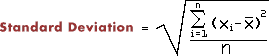

In [1]:
# pseudo code
"""
1. ensure ex1.dat is in wd.
2. look over ex1.dat: 
    tab separated file
    three columns
    all floats of + and - values
    most values are not greater than 5.
3. describe the s.d. formula:
    sqt of:
        sum of (each value's difference from the mean) ** 2) / number of values
4. variables and how we will make them:
   (might both be one-pass, because in both you only used one-list.)
    two-pass approach:
    1. go through ex1.dat to track the number of values, and the sum of the values
    2. go though ex1.dat to calculate each value's difference from the mean, and add then together
    3. put the corresponding results into the s.d. formula.
    one-pass approach ?:
    1. position the loop and variable values stratigically, so by the time we need the total number of values, or means, we have it ready.
-> hunch, difference would be due to rounding errors while calculating the differences between each value and the mean?
"""
def main():
    # fixed filename:
    usr_file = "ex1.dat"
    # prompt usr to choose which approach to use:
    while True:
        approach = input("Please enter 'two-pass' or 'one-pass' (STOP to exit): ")
        if approach == "two-pass":
            two_pass(usr_file)
        elif approach == "one-pass":
            one_pass(usr_file)
        elif approach == "STOP":
            break


def two_pass(filename):
    num_of_vals  = 0
    sum_of_vals = 0
    list_of_vals = []
    
    with open (f"{filename}", "r") as infile:
        for line in infile:
            line = line.split()
            for val in line:
                num_of_vals += 1
                sum_of_vals += float(val)
                list_of_vals.append(float(val))

    mean_vals = sum_of_vals / num_of_vals
    sum_of_sq_diff = 0
    for val in list_of_vals:
        sum_of_sq_diff += (val - mean_vals)**2
    
    sd_of_val =  (sum_of_sq_diff/num_of_vals)**(1/2)    # careful with (1/2)
    print(f"\nThe sd of {filename} is {sd_of_val}\n")    # returns 1.8355023164570765.


def one_pass(filename):
    all_num = []
    with open (f"{filename}", "r") as infile:
        for line in infile:
            for val in line.split():
                all_num.append(float(val))
    
    num_of_vals = len(all_num)
    sum_of_vals = sum(all_num)
    mean_vals = sum_of_vals / num_of_vals
    
    sum_of_sq_diff = 0
    for val in all_num:
        sum_of_sq_diff += (val - mean_vals)**2
    
    sd_of_val = (sum_of_sq_diff / num_of_vals)** (1/2)
    print(f"\nThe sd of {filename} is {sd_of_val}\n")





main()

Please enter 'two-pass' or 'one-pass' (STOP to exit): one-pass

The sd of ex1.dat is 1.8355023164570765

Please enter 'two-pass' or 'one-pass' (STOP to exit): two-pass

The sd of ex1.dat is 1.8355023164570765

Please enter 'two-pass' or 'one-pass' (STOP to exit): STOP


2\. In the files geneA.txt, geneB.txt, all the way down to geneE.txt you have normalized mRNA expression data taken at the time of discovery of colon cancer for a number of patients and their survival. This is basically 2 columns in each file; The mRNA expression (x) and the number of months (y) the patient survived. For each gene you have to make a simple linear regression analysis and find 3 numbers; the α (the intercept - where the line cuts the Y-axis) and β (the slope) coefficient that describes the line running through the data points best, and the correlation coefficient (r) which describes the fitness of the line. You must identify the gene that best indicates how long the patient survives. For every gene you start calculating these values.

In [3]:
# pseudo code
"""
given geneX.txt file
outputs basic values used to calculate the parameters to find the simple linear reg.
def find_values(file)
return the below values:
    sum of x
    sum of x**2
    sum of xy
    sum of y
    sum of y**2
    n as number of observations
"""

def main():
    while True:
        usr_file = input("Please enter a file name from geneA-E.txt (STOP to exit): ")
        if usr_file == "STOP":
            break
        else:
            n_vals, sum_x, sum_x_sq, sum_y, sum_y_sq, sum_xy, x_vals, y_vals = find_values(usr_file)
            usr_beta = get_beta(n_vals, sum_xy, sum_x, sum_y, sum_x_sq)
            usr_alpha = get_alpha(n_vals, sum_y, usr_beta, sum_x)
            usr_r = get_r(n_vals, sum_x, sum_xy, sum_y, sum_x_sq, sum_y_sq)
            
            prediction = get_prediction(usr_beta, x_vals, usr_alpha)
            usr_mean, usr_mode, usr_median = get_comparison(prediction, y_vals)
            print(f"Mean percentage difference {usr_mean}")
            print(f"Mode percentage difference {usr_mode}")
            print(f"Median percentage difference {usr_median}")

# given geneX.txt file
# outputs basic values used to calculate the parameters to find the simple linear reg.
def find_values(file):
    x_vals = []
    x_sq_vals = []
    y_vals = []
    y_sq_vals = []
    xy_vals = []
    with open(f"{file}", "r") as infile:
        for line in infile:
            line = line.split()
            x_vals.append(float(line[0]))
            x_sq_vals.append(float(line[0])**2)
            y_vals.append(float(line[1]))
            y_sq_vals.append(float(line[1])**2)
            xy_vals.append((float(line[0])*float(line[1])))
    n_vals = len(x_vals)
    sum_x = sum(x_vals)
    sum_x_sq = sum(x_sq_vals)
    sum_y = sum(y_vals)
    sum_y_sq = sum(y_sq_vals)
    sum_xy = sum(xy_vals)
    return(n_vals, sum_x, sum_x_sq, sum_y, sum_y_sq, sum_xy, x_vals, y_vals)


def get_beta(n_vals, sum_xy, sum_x, sum_y, sum_x_sq):
    beta_numerator = (n_vals * sum_xy) - (sum_x * sum_y)
    beta_denom = (n_vals * sum_x_sq) - (sum_x)**2
    beta = beta_numerator / beta_denom
    return beta 


def get_alpha(n_vals, sum_y, beta, sum_x):
    alpha_first_part = (sum_y/n_vals)
    alpha_second_part = beta * (sum_x/n_vals)
    alpha = alpha_first_part - alpha_second_part
    return alpha


def get_r(n_vals, sum_x, sum_xy, sum_y, sum_x_sq, sum_y_sq):
    r_numerator = (n_vals * sum_xy) - (sum_x * sum_y)
    r_denom_first_part = (n_vals * sum_x_sq) - ((sum_x)**2)
    r_denom_second_part = (n_vals * sum_y_sq) - ((sum_y)**2)
    r_denom = ((r_denom_first_part)*(r_denom_second_part))**(1/2)
    r = r_numerator/r_denom
    return r


def get_prediction(beta, x_vals, alpha):
    # returns a list of predicted years
    predictions = []
    for x_val in x_vals:
        prediction = (beta * x_val) + alpha
        predictions.append(prediction)
    return predictions


def get_comparison(predictions, y_vals):
    # returns a measure of how good the prediction is compared to reality
    # percentage diffrence as compared to the expected 
    # finds the mean, median, and mode percentage differences.
    import statistics as stat

    comparisons = []
    for prediction in predictions:
        for y_val in y_vals:
            comparison=(abs(y_val-prediction))/y_val
            comparisons.append(float(comparison))
    
    # mean
    mean = ("{:.3f}".format(stat.mean(comparisons)))
    # mode
    mode = ("{:.3f}".format(stat.mode(comparisons)))
    # median
    median = ("{:.3f}".format(stat.median(comparisons)))
    return (mean, mode, median)



main()

"""
comments on the results from geneA-E.txt (see below)
Out of all the geness, gene B has the lowest mode percentage difference between the predicted and actual survival months, at 20.3%.
Much lower than any other gene's, which is between 46.5 to 0.872 percent.
It also has the third lowest mean percentage difference, and the third lowest median percentage difference.

This suggests that in most cases, the prediction from this gene will be 20.3% different from the actula survival month.
On average it will give an amount which differs from reality by a factor of 1.3.
"""

Please enter a file name from geneA-E.txt (STOP to exit): geneA.txt
Mean percentage difference 1.683
Mode percentage difference 0.489
Median percentage difference 0.539
Please enter a file name from geneA-E.txt (STOP to exit): geneB.txt
Mean percentage difference 1.303
Mode percentage difference 0.203
Median percentage difference 0.456
Please enter a file name from geneA-E.txt (STOP to exit): geneC.txt
Mean percentage difference 1.254
Mode percentage difference 0.872
Median percentage difference 0.405
Please enter a file name from geneA-E.txt (STOP to exit): geneD.txt
Mean percentage difference 1.410
Mode percentage difference 0.455
Median percentage difference 0.515
Please enter a file name from geneA-E.txt (STOP to exit): geneE.txt
Mean percentage difference 1.113
Mode percentage difference 0.465
Median percentage difference 0.437
Please enter a file name from geneA-E.txt (STOP to exit): STOP


''

3\. Repeat the previous exercise again with a new type of data file gene_combined.txt, which is more typical in real life. All genes are in one tab separated file. There are 3 columns; gene name, normalized mRNA expression and survival in months. There is no particular order in which the data appears and data lines for several genes might be mixed within each other.

In [ ]:
# pseudo code
"""
1. Look over the mixed file to understand how the genes names are mixed, decide how to separate them.
2. Will need to add a new code def to identify individual genes first while opening the file:
    initiate empty dic to keep track of vals from each gene's vals.
        need one dict for the x vals
        another dict for the y vals
    with open file:
        for line ine file:
            if line.split()[0] == "geneA"
                append the
"""
# code

def main():
    while True:
        usr_file = input("\nPlease enter file name i.e. gene_combined.txt (STOP to exit): ")
        if usr_file == "STOP":
            break
        elif usr_file == "gene_combined.txt":
            x_vals_dict, y_vals_dict, x_sq_vals_dict, y_sq_vals_dict, xy_vals_dict, n_vals_dict, sum_x_dict, sum_x_sq_dict, sum_y_dict, sum_y_sq_dict, sum_xy_dict = get_vals(usr_file)
            usr_beta_dict = get_beta(n_vals_dict, sum_xy_dict, sum_x_dict, sum_y_dict, sum_x_sq_dict)
            usr_alpha_dict = get_alpha(n_vals_dict, sum_y_dict, usr_beta_dict, sum_x_dict, sum_y_sq_dict)
            usr_r_dict = get_r(n_vals_dict, sum_x_dict, sum_xy_dict, sum_y_dict, sum_x_sq_dict, sum_y_sq_dict)
            prediction = get_prediction(usr_beta_dict, x_vals_dict, usr_alpha_dict)
            
            comparison = get_comparison(prediction, y_vals_dict)
            usr_mean, usr_mode, usr_median = get_comparison(prediction, y_vals_dict)
            print(f"Mean percentage difference {usr_mean}")
            print(f"Mode percentage difference {usr_mode}")
            print(f"Median percentage difference {usr_median}")
            print(f"R value: {usr_r_dict}")

def get_vals(file):
    x_vals_dict = {}
    y_vals_dict = {}
    x_sq_vals_dict = {}
    y_sq_vals_dict = {}
    xy_vals_dict = {}
    
    n_vals_dict = {}
    sum_x_dict = {}
    sum_x_sq_dict = {}
    sum_y_dict = {}
    sum_y_sq_dict = {}
    sum_xy_dict = {}

    with open(f"{file}", "r") as infile:
        for line in infile:
            gene_name = line.split()[0]
            if gene_name not in x_vals_dict:
                x_vals_dict[gene_name] = [float(line.split()[1])]
                x_sq_vals_dict[gene_name] = [float(line.split()[1])**2]
                y_vals_dict[gene_name] = [float(line.split()[2])]
                y_sq_vals_dict[gene_name] = [float(line.split()[2])**2]
                xy_vals_dict[gene_name] = [float(line.split()[1])*float(line.split()[2])]
                
            else:
                x_vals_dict[gene_name].append(float(line.split()[1]))
                x_sq_vals_dict[gene_name].append(float(line.split()[1])**2)
                y_vals_dict[gene_name].append(float(line.split()[2]))
                y_sq_vals_dict[gene_name].append(float(line.split()[2])**2)
                xy_vals_dict[gene_name].append(float(line.split()[1])*float(line.split()[2]))


        for k, v in x_vals_dict.items():
            n_vals_dict[k] = len(v)
            sum_x_dict[k] = sum(v)
        for k, v in x_sq_vals_dict.items():
            sum_x_sq_dict[k] = sum(v)
        for k, v in y_vals_dict.items():
            sum_y_dict[k] = sum(v)
        for k, v in y_sq_vals_dict.items():
            sum_y_sq_dict[k] = sum(v)
        for k, v in xy_vals_dict.items():
            sum_xy_dict[k] = sum(v)

    return(x_vals_dict, y_vals_dict, x_sq_vals_dict, y_sq_vals_dict, xy_vals_dict, n_vals_dict, sum_x_dict, sum_x_sq_dict, sum_y_dict, sum_y_sq_dict, sum_xy_dict)


def get_beta(n_vals_dict, sum_xy_dict, sum_x_dict, sum_y_dict, sum_x_sq_dict):
    get_beta_numerator = {}
    get_beta_denom = {}
    beta_dict = {}
    gene_names = list(n_vals_dict.keys())
    for gene_name in gene_names:
        get_beta_numerator[gene_name] = (n_vals_dict[gene_name] * sum_xy_dict[gene_name]) - (sum_x_dict[gene_name] * sum_y_dict[gene_name])
        get_beta_denom[gene_name] = (n_vals_dict[gene_name] * sum_x_sq_dict[gene_name]) - (sum_x_dict[gene_name])**2
        beta_dict[gene_name] = get_beta_numerator[gene_name]/get_beta_denom[gene_name]
    return beta_dict


def get_alpha(n_vals_dict, sum_y_dict, beta_dict, sum_x_dict, sum_y_sq_dict):
    alpha_first_part = {}
    alpha_second_part = {}
    alpha_dict = {}
    gene_names = list(n_vals_dict.keys())
    for gene_name in gene_names:
        alpha_first_part[gene_name] = (sum_y_dict[gene_name]/n_vals_dict[gene_name])
        alpha_second_part[gene_name] = beta_dict[gene_name] * (sum_x_dict[gene_name]/n_vals_dict[gene_name])
        alpha_dict[gene_name] = alpha_first_part[gene_name] - alpha_second_part[gene_name]
    return alpha_dict


def get_r(n_vals_dict, sum_x_dict, sum_xy_dict, sum_y_dict, sum_x_sq_dict, sum_y_sq_dict):
    r_numerator = {}
    r_denom_first_part = {}
    r_denom_second_part = {}
    r_denom = {}
    r_dict = {}
    gene_names = list(n_vals_dict.keys())
    for gene_name in gene_names:
        r_numerator[gene_name] = (n_vals_dict[gene_name] * sum_xy_dict[gene_name]) - (sum_x_dict[gene_name] * sum_y_dict[gene_name])
        r_denom_first_part[gene_name] = (n_vals_dict[gene_name] * sum_x_sq_dict[gene_name]) - ((sum_x_dict[gene_name])**2)
        r_denom_second_part[gene_name] = (n_vals_dict[gene_name] * sum_y_sq_dict[gene_name]) - ((sum_y_dict[gene_name])**2)
        r_denom[gene_name] = ((r_denom_first_part[gene_name])*(r_denom_second_part[gene_name]))**(1/2)
        r_dict[gene_name] = "{:.3f}".format(r_numerator[gene_name]/r_denom[gene_name])
    return r_dict


def get_prediction(beta_dict, x_vals_dict, alpha_dict):
    # returns a dictionary of predicted years
    predictions_dict = {}
    prediction = []
    gene_names = list(x_vals_dict.keys())
    for gene_name in gene_names:
        # fix here, will have to multiple each item in the list with eachother.
        for x_val in x_vals_dict[gene_name]:
            prediction.append((beta_dict[gene_name]) * (x_val) + alpha_dict[gene_name])
            predictions_dict[gene_name] = prediction
    return predictions_dict


def get_comparison(predictions, y_vals_dict):
    import statistics as stat
    
    comparisons = {}
    mean = {}
    median = {}
    mode = {}
    comparison = []
    gene_names = list(y_vals_dict.keys())
    for gene_name in gene_names:
        for prediction in predictions[gene_name]:
            for y_val in y_vals_dict[gene_name]:
                comparison.append(abs(y_val - prediction) / y_val)
                comparisons[gene_name] = comparison
    
        # mean
        mean[gene_name] = ("{:.3f}".format(stat.mean(comparisons[gene_name])))
        # mode
        mode[gene_name] = ("{:.3f}".format(stat.mode(comparisons[gene_name])))
        # median
        median[gene_name] = ("{:.3f}".format(stat.median(comparisons[gene_name])))
    
    return (sorted(mean.items()), sorted(median.items()), sorted(mode.items()))


main()


Please enter file name i.e. gene_combined.txt (STOP to exit): gene_combined.tct

Please enter file name i.e. gene_combined.txt (STOP to exit): gene_combined.txt
Mean percentage difference [('geneA', '1.365'), ('geneB', '1.356'), ('geneC', '1.200'), ('geneD', '1.239'), ('geneE', '1.184')]
Mode percentage difference [('geneA', '0.458'), ('geneB', '0.454'), ('geneC', '0.453'), ('geneD', '0.447'), ('geneE', '0.454')]
Median percentage difference [('geneA', '1.860'), ('geneB', '1.860'), ('geneC', '0.268'), ('geneD', '0.302'), ('geneE', '4.460')]
R value: {'geneE': '0.302', 'geneC': '-0.024', 'geneD': '0.837', 'geneA': '0.617', 'geneB': '0.541'}
